Bu notebook içerisinde Covid19 Pandemi Döneminde Yatan Hastaların durumlarıyla alakalı küçük bir veri seti paylaşılmıştır. Sizden beklenenler:
- Veriyi excel dosyasından okumak
- Veri hakkında EDA sürecini uygulamak
- Gözlemlerinizi belirtmek 
- Preprocessing adımlarını uygulamak
- FIM ve Association rule Extaction
- Sonuçları değerlendirmek

- pip install xlrd
- pip install pandas
- pip install numpy
- pip install mlxtend
- pip install scikit-learn
- pip install matplotlib
- pip install seaborn 

# 1. Import Libraries

- NumPy, Pandas gibi paketlerin import edilmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 2. Load Dataset
- excel dosyasının içindeki "data_reduced" sheet'ini oku


Veri seti COVID-19 hastalarının klinik bilgilerini ve sonuçlarını içermektedir.
Hastalara ait cinsiyet ve yaş bilgisi bulunmaktadır. Ek olarak hastalık durumlarının ne olduğuna dair, başka hangi 
hastalıklarının olduğuna veya olmadığına dair, semptomlar başladıktan kaç gün sonra hastaneye geldiklerine dair, 
sonuç durumlarının ne olduğuna dair ve hastanede kaç gün kaldıklarına dair bilgiler yer almaktadır.


In [2]:
data = pd.read_excel('COVID19 inpatient cases data.xls', sheet_name='data_reduced')

# 3. Exploratory Data Analysis 

- Görselleştirme ve analiz gerçekleştirilip, yorumlarda bulunulması bekleniyor

In [3]:
df = data.copy()
df.head()

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Clinical outcome,"Hospital stay, days"
0,Male,47,Heavy,15,Y,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,"Aggravated,turn to ICU",NaN
1,Female,53,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,6.0
2,Female,57,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,8.0
3,Male,58,Heavy,1,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,"Aggravated,transfer to superior hospital",NaN
4,Male,54,Ordinary,10,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gender                                      73 non-null     object 
 1   Age                                         73 non-null     int64  
 2   Clinical classification                     73 non-null     object 
 3   Days from symptoms to hospital              73 non-null     int64  
 4   No comorbidity                              73 non-null     object 
 5   Cardiovascular and
cerebrovascular disease  73 non-null     object 
 6   Endocrine system disease                    73 non-null     object 
 7   Malignant tumor                             73 non-null     object 
 8   Respiratory system disease                  73 non-null     object 
 9   Digestive system disease                    73 non-null     object 
 10  Renal disease   


Veri setine genel olarak baktığımız zaman;

3 farklı type görüyoruz; object (17 değişken) , int64 (1 değişken) ve float64 (1 değişken).
Veri setimizde toplam 73 kayıt bulunmaktadır. 
"Hospital stay, days" sütunu dışında null değer içeren sütun yoktur. Orda da 4 adet null değer bulunmaktadır.



In [5]:
# Verimizi işlemeden önce null değerleri ortalama kullanarak doldurduk.
df['Hospital stay, days'].fillna(df['Hospital stay, days'].mean(), inplace=True)

In [6]:
cat_df = df.select_dtypes(include = ["object"])
cat_df.head()

,Gender,Clinical classification,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Clinical outcome
0,Male,Heavy,Y,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,"Aggravated,turn to ICU"
1,Female,Ordinary,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge
2,Female,Ordinary,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge
3,Male,Heavy,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,"Aggravated,transfer to superior hospital"
4,Male,Ordinary,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge


In [7]:
# Kategorik sütunlarda yer alan değerlerin dağılımları görüntülüyoruz.

print("Cinsiyet Dağılımı:\n", df['Gender'].value_counts())
print("\nKlinik Sınıflandırma Dağılımı:\n", df['Clinical classification'].value_counts())
print("\nNo comorbidity Dağılımı:\n", df['No comorbidity'].value_counts())
print("\nCardiovascular and cerebrovascular disease Dağılımı:\n", df['Cardiovascular and\ncerebrovascular disease'].value_counts())
print("\nEndocrine system disease Dağılımı:\n", df['Endocrine system disease'].value_counts())
print("\nMalignant tumor Dağılımı:\n", df['Malignant tumor'].value_counts())
print("\nRespiratory system disease Dağılımı:\n", df['Respiratory system disease'].value_counts())
print("\nDigestive system disease Dağılımı:\n", df['Digestive system disease'].value_counts())
print("\nRenal disease Dağılımı:\n", df['Renal disease'].value_counts())
print("\nLiver disease Dağılımı:\n", df['Liver disease'].value_counts())
print("\nFever Dağılımı:\n", df['Fever'].value_counts())
print("\nCough Dağılımı:\n", df['Cough'].value_counts())
print("\nChest tightness Dağılımı:\n", df['Chest tightness'].value_counts())
print("\nFatigue Dağılımı:\n", df['Fatigue'].value_counts())
print("\nDiarrhea Dağılımı:\n", df['Diarrhea'].value_counts())
print("\nOthers Dağılımı:\n", df['Others'].value_counts())
print("\nClinical outcome Dağılımı:\n", df['Clinical outcome'].value_counts())

Cinsiyet Dağılımı:
 Male      37
Female    36
Name: Gender, dtype: int64

Klinik Sınıflandırma Dağılımı:
 Ordinary    49
Heavy       24
Name: Clinical classification, dtype: int64

No comorbidity Dağılımı:
 Y    39
N    34
Name: No comorbidity, dtype: int64

Cardiovascular and cerebrovascular disease Dağılımı:
 N    53
Y    20
Name: Cardiovascular and\ncerebrovascular disease, dtype: int64

Endocrine system disease Dağılımı:
 N    63
Y    10
Name: Endocrine system disease, dtype: int64

Malignant tumor Dağılımı:
 N    69
Y     4
Name: Malignant tumor, dtype: int64

Respiratory system disease Dağılımı:
 N    72
Y     1
Name: Respiratory system disease, dtype: int64

Digestive system disease Dağılımı:
 N    72
Y     1
Name: Digestive system disease, dtype: int64

Renal disease Dağılımı:
 N    72
Y     1
Name: Renal disease, dtype: int64

Liver disease Dağılımı:
 N    72
Y     1
Name: Liver disease, dtype: int64

Fever Dağılımı:
 Y    55
N    18
Name: Fever, dtype: int64

Cough Dağılımı:



Bu dağılımları yorumlayacak olursak:
Veri setinde yer alan kadın ve erkek hasta sayıları birbirine oldukça yakındır.
Hastaların durumlarına baktığımız zaman ağır hasta sayısı daha azdır. 
Covid-19 dışında ek olarak hastalığı olan hasta sayısı 34'dür. 39 hastanın ise ek hastalığı yoktur.

Ek hastalığı olan hastalar için; 

Kardiyovasküler ve serebrovasküler hastalığı olan hasta sayısı 20,
Endokrin sistem hastalığı olan hasta sayısı 10,
Kötü huylu tümörü olan hasta sayısı 4,
Solunum sistemi hastalığı olan hasta sayısı 1,
Sindirim sistemi hastalığı olan hasta sayısı 1,
Böbrek hastalığı olan hasta sayısı 1,
Karaciğer hastalığı olan hasta sayısı 1'dir.

Covid-19 hastalarının gösterdiği semptomlara baktığımız zaman:

55 hastada ateş ve öksürük gözlenmişken, 18 hastada gözlenmemiştir.
21 hastada göğüste sıkışma gözlenmişken, 52 hastada gözlenmemiştir.
10 hastada bitkinlik gözlenmişken, 63 hastada gözlenmemiştir.
8 hastada ishal gözlenmişken, 65 hastada gözlenmemiştir.

10 hasta bu belirtiler dışında farklı belirtileri de olduğunu belirtmiştir.

69 hasta iyileştirilmiş ve taburcu edilmiştir.
1 hasta ağırlaşmış ve yoğun bakıma dönmüştür.
1 hasta ağırlaşmış ve üst hastaneye sevk edilmiştir.
1 hasta ise ölmüştür.

Kategorik değişkenlerimizi bu şekilde yorumlayabiliriz.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,73.0,55.671233,15.136467,21.0,46.0,57.0,68.0,87.0
Days from symptoms to hospital,73.0,10.260274,7.514851,1.0,4.0,9.0,14.0,40.0
"Hospital stay, days",73.0,15.188406,8.192604,4.0,8.0,14.0,21.0,36.0


Veri setimizde yer alan nümerik değişkenlerin istatistiksel özetini aldık. Buraya baktığımız zaman değişkenlerin sayısını, aritmetik ortalamasını, standart sapmalarını, en küçük değeri, en büyük değeri ve veri noktalarının ilk çeyrek, median ve 3. çeyrek değerlerini görebiliyoruz.


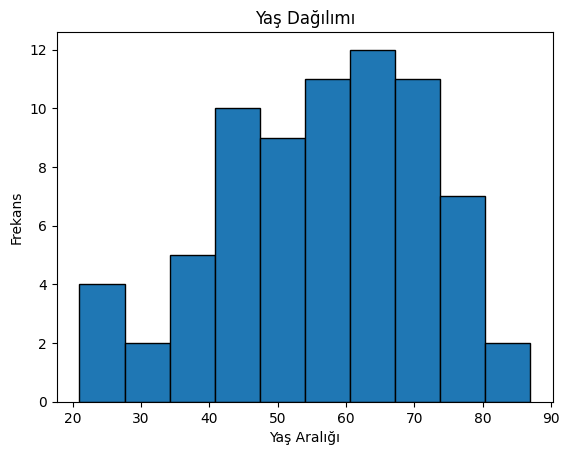

In [9]:
df['Age'].plot.hist(bins=10, edgecolor='k')
plt.xlabel('Yaş Aralığı')
plt.ylabel('Frekans')
plt.title('Yaş Dağılımı')
plt.show()

Age değişkenin histogramına baktığımız zaman hastaların çoğunluğunun 40-70 yaş aralığında olduğunu görebiliyoruz. Bu durumda bu yaş aralığındaki hastalarda hastalığın daha sık gözlemlendiğini söyleyebiliriz. 

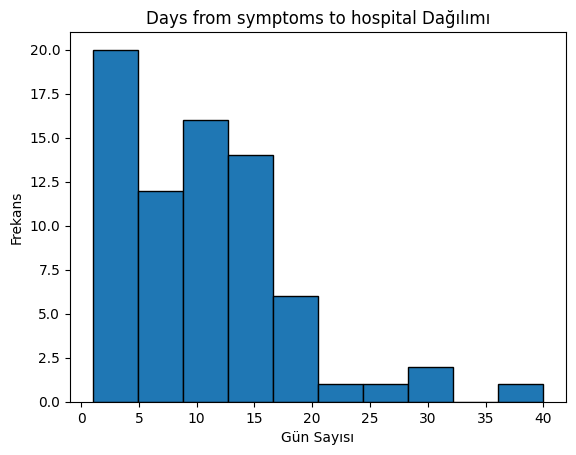

In [10]:
df['Days from symptoms to hospital'].plot.hist(bins=10, edgecolor='k') 
plt.xlabel('Gün Sayısı')
plt.ylabel('Frekans')
plt.title('Days from symptoms to hospital Dağılımı')
plt.show()

'Days from symptoms to hospital' değişkenin histogramına baktığımız zaman hastaların büyük çoğunluğunun semptomlar gözüktükten 1-2 hafta içerisinde hastaneye gittiğini gösteriyor. Geri kalan hastaların ise bir kısmı 3 hafta sonra giderken bir kısmı 1 ay sonra gitmiştir. Çok az bir kısım ise 40 günlük bir sürecin ardından gitmiştir.

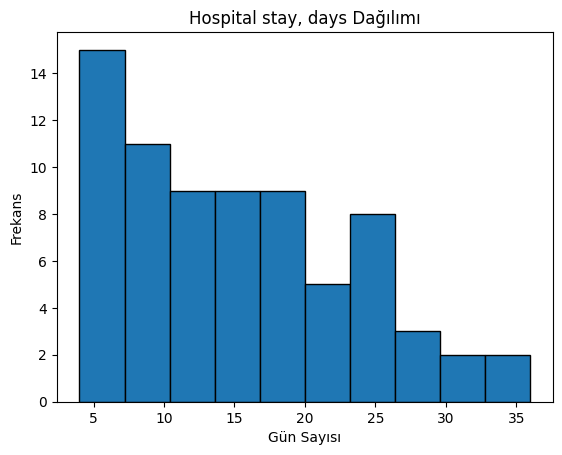

In [11]:
df['Hospital stay, days'].plot.hist(bins=10, edgecolor='k')
plt.xlabel('Gün Sayısı')
plt.ylabel('Frekans')
plt.title('Hospital stay, days Dağılımı')
plt.show()

Hastaların hastanede kalma sürelerini görüntülediğimiz bu histograma göre, çoğunluk olarak hastaların 5-10 gün kaldığını görüyoruz. Gün sayısının artmasıyla ters orantılı olarak hasta sayısı azalmıştır. Yani 30-35 gün yatan hasta sayısı 5-10 gün yatan hasta sayısına göre daha düşüktür. 

# 4. Preprocessing 

## 4.1. Hastalıklar DataFrame'inin Oluşturulması
- df_diseases dataframe'ini şu sütunları ana dataframe'den seçerek oluştur: **['Cardiovascular and\ncerebrovascular disease', 'Endocrine system disease','Malignant tumor','Respiratory system disease', 'Digestive system disease','Renal disease','Liver disease']**
- df_diseases dataframe'ine ana dataframe içerisindeki şu sütunları ekle:**['Age','Gender']**
- df_diseases dataframe'ine **Illness** diye bir sütun oluştur ve bu sütunu ana dataframe'deki **Clinical classification** sütunu ile doldur ve her doldurdugun her verinin sonuna **' ill'** ekle
- **'Age Group'** diye bir sütun oluştur ve **'Age'** sütunundaki verilere göre şu şekilde kategorize et: <br>
    **{"Elderly": (Age>=65),<br> "Adults": (18<= Age <65),<br>"Teens": (12=<Age<18), <br>"Children": (1<Age<11), <br> "Infants": (Age<=1) }**
- Kategorizasyon bittikten sonra **'Age'** sütununu drop et
- **"Gender", "Illness", "Age Group"** sütunlarını one-hot encoding için dummy hale getir 
- **"Gender", "Illness", "Age Group"** drop et
- Tüm veriyi boolean(True,False) hale getir.**{'Y': True, 'N': False}**

In [12]:
df_diseases = df[['Cardiovascular and\ncerebrovascular disease', 'Endocrine system disease', 'Malignant tumor', 'Respiratory system disease', 'Digestive system disease', 'Renal disease', 'Liver disease']]

df_new = df[['Age', 'Gender']]
df_diseases = df_diseases.join(df_new[['Age', 'Gender']])

df_diseases['Illness'] = df['Clinical classification'] + ' ill'

def determine_age_group(age):
    if age >= 65:
        return 'Elderly'
    elif 18 <= age < 65:
        return 'Adults'
    elif 12 <= age < 18:
        return 'Teens'
    elif 1 < age < 11:
        return 'Children'
    elif age <= 1:
        return 'Infants'
    else:
        return 'Unknown'

df_diseases['Age Group'] = df_diseases['Age'].apply(determine_age_group)
df_diseases.drop('Age', axis=1, inplace=True)

Gender_dummy = pd.get_dummies(df_diseases['Gender'])
Illness_dummy = pd.get_dummies(df_diseases['Illness'])
AgeGroup_dummy = pd.get_dummies(df_diseases['Age Group'])

df_diseases.drop(columns=['Gender','Illness','Age Group'],inplace=True)

df_diseases = df_diseases.replace({'Y': True, 'N': False})

In [13]:
df_diseases

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
68,False,False,False,False,False,False,False
69,False,True,False,False,False,False,False
70,True,False,False,False,False,False,False
71,True,False,False,False,False,False,False


## 4.2. Semptomlar DataFrame'inin Oluşturulması
- Ana dataframe'den sütunları seç : **['Fever', 'Cough','Chest tightness', 'Fatigue', 'Diarrhea', 'Others']** ve **df_symptoms** diye bir dataframe oluştur
- **'Covid19'** diye bir sütun oluştur ve tüm değerlerini **'Y'** olarak ata
- **df_symptom_exntended** diye bir dataframe oluştur. Bu dataframe'i oluştururken **df_disease** içerisindeki dummy **"Gender","Illness","Age Group"** verileri ile **df_symptom** dataframe'ini y ekseninde concat et. (axis=1)


In [14]:
df_symptom = df[['Fever', 'Cough', 'Chest tightness', 'Fatigue', 'Diarrhea', 'Others']]

df_symptom = df_symptom.assign(Covid19='Y')
df_symptom =df_symptom.replace({'Y': True, 'N': False})

df_diseases_new = [df_symptom] + [Gender_dummy, Illness_dummy, AgeGroup_dummy]
df_symptom_extended = pd.concat(df_diseases_new, axis=1)

df_symptom_extended.drop(columns='Covid19', inplace=True)

In [15]:
df_symptom

,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Covid19
0,True,True,True,True,True,False,True
1,True,True,True,False,False,False,True
2,True,True,False,False,False,False,True
3,False,False,False,False,False,False,True
4,True,True,True,False,False,False,True
...,...,...,...,...,...,...,...
68,True,True,False,False,False,False,True
69,False,True,False,True,False,False,True
70,False,True,False,False,False,False,True
71,True,True,False,False,False,False,True


In [16]:
df_symptom_extended

,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Female,Male,Heavy ill,Ordinary ill,Adults,Elderly
0,True,True,True,True,True,False,0,1,1,0,1,0
1,True,True,True,False,False,False,1,0,0,1,1,0
2,True,True,False,False,False,False,1,0,0,1,1,0
3,False,False,False,False,False,False,0,1,1,0,1,0
4,True,True,True,False,False,False,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68,True,True,False,False,False,False,1,0,0,1,1,0
69,False,True,False,True,False,False,1,0,0,1,1,0
70,False,True,False,False,False,False,1,0,0,1,0,1
71,True,True,False,False,False,False,1,0,0,1,1,0


# 5. Apriori: Frequent Itemset Mining & Association Rule Extraction

- df_symptoms için apriori ile min_support=0.02 olan itemset'lerini bul 
- df_symptoms için bulduğun itemset'lerden association rule'larını confidence >= 0.6 ve support >=0.2 olacak şekilde kuralları çıkar ve rules0 değişkenine ata.

Semptom verileri("df_symptom") üzerinde Apriori algoritması kullanarak öğe kümesi analizi yapılır ve bu analize dayalı ilişki kuralları (rules0) çıkarılır. Bu kurallar, semptomların Covid-19 ile ilişksini araştırır.

In [17]:
itemset0 = apriori(df_symptom, min_support=0.02, use_colnames=True)

rules0 = association_rules(itemset0,metric='confidence',min_threshold=0.6)
rules0[rules0['support']>=0.2]

rules0

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Fever),(Cough),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137,0.147287
1,(Cough),(Fever),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137,0.147287
2,(Chest tightness),(Fever),0.287671,0.753425,0.260274,0.904762,1.200866,0.043535,2.589041,0.234818
3,(Fatigue),(Fever),0.136986,0.753425,0.109589,0.800000,1.061818,0.006380,1.232877,0.067460
4,(Diarrhea),(Fever),0.109589,0.753425,0.095890,0.875000,1.161364,0.013323,1.972603,0.156044
...,...,...,...,...,...,...,...,...,...,...
140,"(Fatigue, Covid19, Others, Cough)",(Fever),0.027397,0.753425,0.027397,1.000000,1.327273,0.006755,inf,0.253521
141,"(Fatigue, Fever, Others)","(Covid19, Cough)",0.027397,0.753425,0.027397,1.000000,1.327273,0.006755,inf,0.253521
142,"(Fatigue, Others, Cough)","(Fever, Covid19)",0.027397,0.753425,0.027397,1.000000,1.327273,0.006755,inf,0.253521
143,"(Fatigue, Covid19, Others)","(Fever, Cough)",0.027397,0.589041,0.027397,1.000000,1.697674,0.011259,inf,0.422535


- df_symptoms_extended için apriori ile min_support=0.02 olan itemset'lerini bul 
- df_symptoms_extended için bulduğun itemset'lerden association rule'larını confidence >= 0.6 ve support >=0.2 olacak şekilde kuralları çıkar ve rules1 değişkenine ata.

Hastaların semptomları ile hastaların cinsiyet, yaş grupları ve hastalık durumlarının birleştirilmiş verisi ("df_symptom_extended") üzerinde öğe kümesi analizi yapılır ve bu analize dayalı ilişki kuralları ("rules1") çıkarılır. 
Bu kurallar, semptomların cinsiyet, yaş grupları ve hastalık durumu ile olan ilişkisini araştırır.

In [18]:
itemset1 = apriori(df_symptom_extended, min_support=0.02, use_colnames=True)

rules1 = association_rules(itemset1, metric='confidence', min_threshold=0.6)
rules1 = rules1[rules1['support'] >= 0.2]

rules1

C:\Users\kgel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\mlxtend\frequent_patterns\fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Fever),(Cough),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137,0.147287
1,(Cough),(Fever),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137,0.147287
2,(Chest tightness),(Fever),0.287671,0.753425,0.260274,0.904762,1.200866,0.043535,2.589041,0.234818
6,(Female),(Fever),0.493151,0.753425,0.424658,0.861111,1.142929,0.053106,1.775342,0.246731
7,(Male),(Fever),0.506849,0.753425,0.328767,0.648649,0.860934,-0.053106,0.701791,-0.246731
...,...,...,...,...,...,...,...,...,...,...
488,"(Fever, Female, Ordinary ill)",(Adults),0.232877,0.671233,0.232877,1.000000,1.489796,0.076562,inf,0.428571
489,"(Fever, Adults, Ordinary ill)",(Female),0.369863,0.493151,0.232877,0.629630,1.276749,0.050479,1.368493,0.343990
490,"(Female, Adults, Ordinary ill)",(Fever),0.260274,0.753425,0.232877,0.894737,1.187560,0.036780,2.342466,0.213508
491,"(Female, Adults)","(Fever, Ordinary ill)",0.342466,0.452055,0.232877,0.680000,1.504242,0.078063,1.712329,0.509804


- df_diseases için apriori ile min_support=0.02 olan itemset'lerini bul 
- df_diseases için bulduğun itemset'lerden association rule'larını confidence >= 0.6 ve support >=0.1 olacak şekilde kuralları çıkar ve rules2 değişkenine ata.

Son olarak, ("df_diseases") üzerinde öge kümesi analizi yapılır ve bu analize dayalı ilişki kuralları ("rules2") çıkarılır. 
Bu kurallar, diğer hastalıklar arasındaki ilişkileri kapsıyor.

Aldığımız çıktının boş olması, belirlediğimiz min_support ve min_threshold değeri kullanıldığında, bu belirtilen değerlere uyan hiçbir kural olmadığını gösterir.  

In [19]:
itemset2 = apriori(df_diseases, min_support=0.02, use_colnames=True)

rules2 = association_rules(itemset2, metric='confidence', min_threshold=0.6)
rules2 = rules2[rules2['support'] >= 0.1]

rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### rules0 değişkenindeki kuralları bul : (...) -> (Covid19)    
- confidence >= 0.6  ve support >= 0.2 olmalı 

In [20]:
filtered_rules = rules0[(rules0['confidence'] >= 0.6) & (rules0['support'] >= 0.2)]

covid_rules = filtered_rules[filtered_rules['consequents'] == frozenset({'Covid19'})]

covid_rules = pd.DataFrame(covid_rules[['antecedents', 'consequents']])

covid_rules

,antecedents,consequents
6,(Fever),(Covid19)
13,(Cough),(Covid19)
14,(Chest tightness),(Covid19)
28,"(Fever, Cough)",(Covid19)
33,"(Fever, Chest tightness)",(Covid19)
51,"(Chest tightness, Cough)",(Covid19)
73,"(Fever, Chest tightness, Cough)",(Covid19)


Bu data frame, belirli bir confidence ve support değerine sahip olan ve sonucunda "Covid19" bulunan kuralları içerir.

Her satırda, bir veya daha fazla semptomun Covid-19 ile ilişkilendirildiği kuralları görüyoruz. Bu kurallara bakarak hangi belirtilerin Covid-19 ile ilişkilendirilebileceğine karar verebiliriz. Mesela 'fever' belirtisi olan bir hasta Covid-19 geçiriyor olabilir. Ya da aynı şekilde 'cough' ve 'Chest tightness' için de aynı şeyi söyleyebiliriz. Aynı zamanda bazı hastalarda bu belirtilerin tamamının ya da herhangi ikisinin de belirti olarak ortaya çıkması mümkündür.


### rules1 ve rules2 değişkenindeki kuralları bul (item1, item 2) -> (..)
-  confidence >= 0.6 olmalı ve support >= 0.1 olmalı 
-  len(antecedents) >= 2

In [21]:
rules1['antecedent_len'] = rules1['antecedents'].apply(len)

filtered_rules1 = rules1[
    (rules1['antecedent_len'] > 1) &  
    (rules1['confidence'] >= 0.6) & 
    (rules1['support'] >= 0.1)  
]

filtered_rules1 = filtered_rules1[['antecedents', 'consequents']]

filtered_rules1

,antecedents,consequents
41,"(Fever, Chest tightness)",(Cough)
42,"(Chest tightness, Cough)",(Fever)
50,"(Fever, Female)",(Cough)
51,"(Female, Cough)",(Fever)
53,"(Fever, Male)",(Cough)
54,"(Male, Cough)",(Fever)
55,"(Fever, Heavy ill)",(Cough)
56,"(Heavy ill, Cough)",(Fever)
58,"(Fever, Ordinary ill)",(Cough)
59,"(Ordinary ill, Cough)",(Fever)


Burada 'df_symptom_extended' veri setinden çıkarılan kuralların(rules1) belirli filtrelere göre analizi gerçekleştiriliyor.

Bu kurallar, belirli semptomların veya durumların diğer semptomlarla ilişkisini belirlemeye yardımcı olabilir. Aldığımız çıktıyı incelediğimiz zaman; mesela ilk satır için (Fever, Chest tightness) semptomlarının (Cough) semptomu ile ilişkilendirildiğini görebiliyoruz. Bunun yanı sıra yalnızca semptomlar arasındaki ilişkiyi gösterdiğini söylemek yanlış olur çünkü rules1 kurallarını çıkarırken kullandığımız data frame (df_symptom_extended) semptomların yanında cinsiyet, hastalık durumu ve yaş ile alakalı bilgi de içeriyor. Bu nedenle ilişkilendirilen kurallar arasında bu bilgileri içeren kurallar da yer almaktadır. 

Mesela; 487. indexte (Fever, Ordinary ill, Female) ile  (Adults) ilişkisini görebiliyoruz. 

In [22]:
rules2['antecedent_len'] = rules2['antecedents'].apply(len)

filtered_rules2 = rules2[
    (rules2['antecedent_len'] > 1) &  
    (rules2['confidence'] >= 0.6) & 
    (rules2['support'] >= 0.1)  
]

filtered_rules2 = filtered_rules2[['antecedents', 'consequents']]

filtered_rules2

,antecedents,consequents


Burada 'df_diseases' veri setinden çıkarılan, rules2 kurallar listesine benzer bir işlem uyguluyoruz. Aynı filtrelere göre filtreleme yapıyoruz.

rules2 kural listesinin boş olmasının sebebini belirtilen değerlere uyan hiçbir kural olmaması olarak belirtmiştik. Aynı şekilde burda da rules2 kurallarına göre yapılan analizde boş bir çıktı ile karşılaştık. 

Bunun anlamı df_diseases veri setindeki ögelerin birbiriyle ilişkili olmadığıdır. Yani o veri setinin içeriğine bakarak yorum yapmamız gerekirse, Covid-19 hastalığına ek olarak belirtilen hastalıkların kendi içinde birbirleriyle bir ilişkisi bulunmamaktadır diyebiliriz.
